
# Project: Investigate a Dataset (The Movie Database (TMDb))


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we are going to investigate a very popular database in relation with the world of the movie, it's the data set that contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue, I know it's very execting data set to get some information from.

In [22]:
import pandas as pd
import numpy as np
from scipy.integrate import quad
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style('whitegrid')
%matplotlib inline




<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
#   types and look for instances of missing or possibly errant data.
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [65]:
# Informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
popularity            3854 non-null float64
budget                3854 non-null int64
revenue               3854 non-null int64
original_title        3854 non-null object
director              3854 non-null object
runtime               3854 non-null int64
release_date          3854 non-null object
vote_count            3854 non-null int64
vote_average          3854 non-null float64
release_year          3854 non-null int64
budget_adj            3854 non-null float64
revenue_adj           3854 non-null float64
vote_average_desct    3854 non-null category
dtypes: category(1), float64(4), int64(5), object(3)
memory usage: 555.4+ KB


In [3]:
print("{:<25} {:<20}\n".format("Attibut","Data type"))

for col in df.columns:
    print("{:<25} {:<20}".format(col,str(type(df[col][0])).split("'")[1]))
    
    

Attibut                   Data type           

id                        numpy.int64         
imdb_id                   str                 
popularity                numpy.float64       
budget                    numpy.int64         
revenue                   numpy.int64         
original_title            str                 
cast                      str                 
homepage                  str                 
director                  str                 
tagline                   str                 
keywords                  str                 
overview                  str                 
runtime                   numpy.int64         
genres                    str                 
production_companies      str                 
release_date              str                 
vote_count                numpy.int64         
vote_average              numpy.float64       
release_year              numpy.int64         
budget_adj                numpy.float64       
revenue_adj 

In [4]:
df.drop(['id','imdb_id','cast','homepage','tagline','keywords','overview','genres','production_companies'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [6]:
df=df[df.isnull().any(axis=1)==False]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10822 non-null float64
budget            10822 non-null int64
revenue           10822 non-null int64
original_title    10822 non-null object
director          10822 non-null object
runtime           10822 non-null int64
release_date      10822 non-null object
vote_count        10822 non-null int64
vote_average      10822 non-null float64
release_year      10822 non-null int64
budget_adj        10822 non-null float64
revenue_adj       10822 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10822.000000,1.082200e+04,1.082200e+04,10822.000000,10822.000000,10822.000000,10822.000000,1.082200e+04,1.082200e+04
mean,0.648525,1.468400e+07,3.998422e+07,102.129366,218.201811,5.971419,2001.295694,1.762126e+07,5.157217e+07
std,1.001657,3.096237e+07,1.172138e+08,30.871482,576.646675,0.933675,12.819367,3.435805e+07,1.448894e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.209038,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.385161,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.716278,1.530000e+07,2.431464e+07,111.000000,146.000000,6.600000,2011.000000,2.099042e+07,3.397891e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


there is some rows with budget or revenue with 0 value

In [9]:
df = df[df.revenue>0]
df = df[df.budget>0]

## Q1 how much the film industry did grow in the past 50 years 


In [10]:
df_budget =df.groupby('release_year')['budget'].agg({'budget':sum})
df_revenue=df.groupby('release_year')['revenue'].agg({'revenue':sum})


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


top 5 year in the movie industry in terms of net revenue

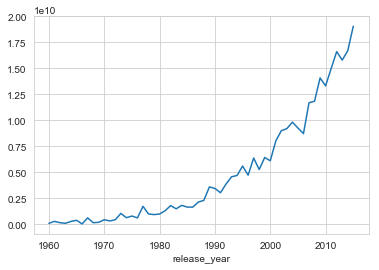

In [24]:
(df_revenue['revenue']-df_budget['budget']).plot(kind="line")


### is there any corelation between film budget and   the rating


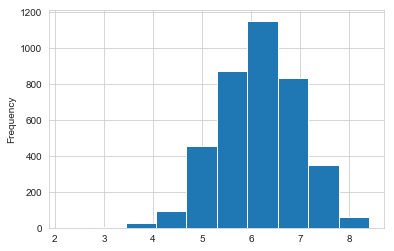

In [23]:
df["vote_average"].plot(kind="hist")

we need to do some data discretization  to have more precise rate categorie 

In [26]:
df["vote_average"].describe()

count    3854.000000
mean        6.167955
std         0.795121
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [27]:
bin_labels_5 = ['bad', 'okay', 'good', 'fantastic', 'masterpiece']
df['vote_average_desct'] = pd.qcut(df['vote_average'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)

In [28]:
df['vote_average_desct'].value_counts()

okay           828
bad            819
masterpiece    768
good           753
fantastic      686
Name: vote_average_desct, dtype: int64

In [31]:
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_average_desct
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,fantastic


In [45]:
df.groupby("vote_average_desct")['budget'].mean()#.plot(kind="")

vote_average_desct
bad            3.480367e+07
okay           3.911287e+07
good           3.927693e+07
fantastic      3.578473e+07
masterpiece    3.697312e+07
Name: budget, dtype: float64

### best 10 movies of all times

#### based on the popularity

In [62]:
df.groupby("popularity")["original_title"].max()[10.7:]

popularity
10.739009    The Hunger Games: Mockingjay - Part 1
11.173104             Star Wars: The Force Awakens
11.422751                                John Wick
12.037933                                Star Wars
12.971027      Captain America: The Winter Soldier
13.112507                                Insurgent
14.311205                  Guardians of the Galaxy
24.949134                             Interstellar
28.419936                       Mad Max: Fury Road
32.985763                           Jurassic World
Name: original_title, dtype: object

#### based on the avrage rating

In [64]:
df.groupby("vote_average")["original_title"].max()[7.5:]

vote_average
7.5            Young Frankenstein
7.6    X-Men: Days of Future Past
7.7                Vals Im Bashir
7.8                    Waste Land
7.9       The Wolf of Wall Street
8.0            The Usual Suspects
8.1        The Godfather: Part II
8.2                      Whiplash
8.3                 The Godfather
8.4      The Shawshank Redemption
Name: original_title, dtype: object

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!